In [1]:
import pandas as pd
import networkx as nx
from IPython.display import Image,display_jpeg
import numpy as np

In [2]:
#create toy data for visualization

product_id = [0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3]
warehouse_id = [0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 3]
stock_num = [3, 5, 4, 1, 5, 7, 1, 6, 4, 4, 10, 8]
#If from_where==-1,then the product is transported from the supplier to the warehouse
#If from_where>=0, then the product is transported from warehouse to warehouse of corresponding id
from_where = [-1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 0, 1]
#If to_customer==1, then the product is ship from the warehouse to the customer.
to_customer = [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]

df = pd.DataFrame({"product_id": product_id, "warehouse_id": warehouse_id, "stock_num": stock_num, "from_where": from_where, "to_customer": to_customer})

In [3]:
df

,product_id,warehouse_id,stock_num,from_where,to_customer
0,0,0,3,-1,1
1,0,1,5,-1,0
2,0,2,4,1,1
3,1,1,1,-1,1
4,1,2,5,-1,1
5,2,0,7,-1,1
6,2,1,1,-1,0
7,2,2,6,1,1
8,3,0,4,-1,0
9,3,1,4,-1,0


In [4]:
#to get graph
def get_graph(product_id, df):
  df_target = df[df["product_id"]==product_id]
  edgelist = []
  stock_num_dict = {}

  #get edgelist
  for row in df_target.itertuples():
    if row.to_customer == 1:
      edgelist.append(("warehouse_id: " + str(row.warehouse_id), "customer"))

    if row.from_where!=-1:
      edgelist.append(("warehouse_id: " + str(row.from_where), "warehouse_id: " + str(row.warehouse_id)))
    elif row.from_where==-1:
      edgelist.append(( "supplier", "warehouse_id: " + str(row.warehouse_id)))
    #Set the label attribute of the node and the color attribute from the stockNum corresponding to the node.
    stock_num_dict["warehouse_id: " + str(row.warehouse_id)] = {"label": "warehouse_id: " + str(row.warehouse_id) + "\nstock_num: " + str(row.stock_num), "color": "red" if row.stock_num <= 2 else "black"}
    

  #Create a graph from edgelist
  G = nx.from_edgelist(edgelist, create_using=nx.DiGraph())  
  #Set attributes that serve as criteria for judging the identity of a graph.
  name_dict = {i: {"identity": i} for i in G.nodes()}
  
  #
  nx.set_node_attributes(G, name_dict)
  nx.set_node_attributes(G, stock_num_dict)
  return G

  
  

  

In [5]:
def draw_graph(G):
  G = nx.nx_agraph.to_agraph(G)
  G.draw('test.jpeg', prog='dot')
  display_jpeg(Image('test.jpeg'))

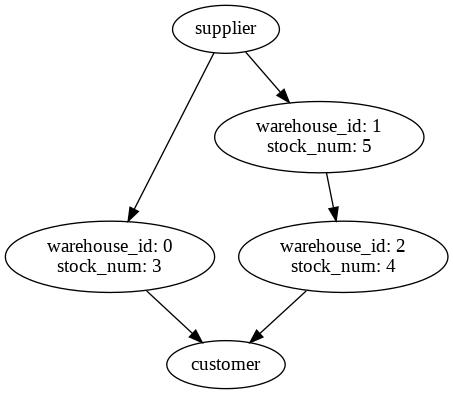

In [6]:
draw_graph(get_graph(0, df))

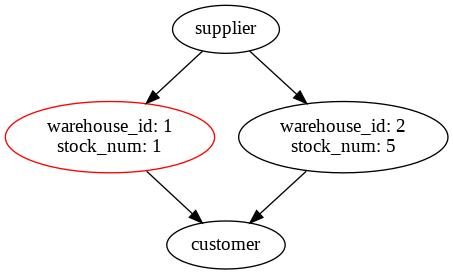

In [7]:
#you can detect stock shortage like this
draw_graph(get_graph(1, df))

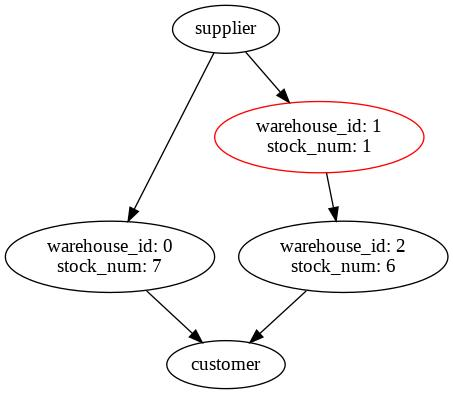

In [8]:
#product_id: 2 has the same transport path as product_id: 0
draw_graph(get_graph(2, df))

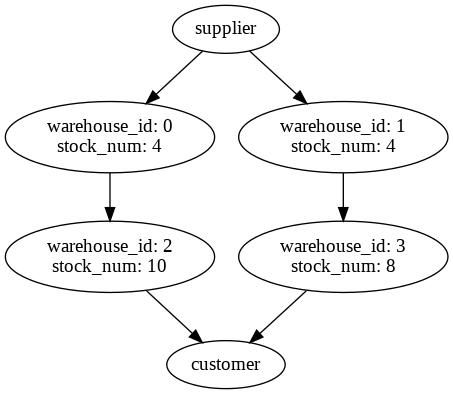

In [9]:
draw_graph(get_graph(3, df))

In [10]:
#Create graph list for all products
graph_list = []
for i, m in enumerate(np.unique(df["product_id"].to_numpy())):
  g = get_graph(m, df)
  graph_list.append([m, g])


In [11]:

len(graph_list)

4

In [12]:
#Determine graphs with the same transport path and remove duplicates
unique_list = []
for i, (m1, g1) in enumerate(graph_list):
  iso_flag = False
  for m2, g2 in graph_list[i+1:]:
    #Determine graph identity using "identity" attributes
    if nx.is_isomorphic(g1, g2, node_match=nx.algorithms.isomorphism.categorical_edge_match("identity", "")):
      iso_flag = True
      break
  if not iso_flag:
    unique_list.append([m1, g1])

      


In [13]:
#length of unique_list is 3 because product_id: 2 has the same transport path as product_id: 0
len(unique_list)

3